In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit as cf
from scipy.stats import chi2
from math import floor
from scipy.interpolate import UnivariateSpline
import scipy.interpolate as si
from scipy.signal import find_peaks as fpk
from scipy.optimize import curve_fit as cf

In [2]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['font.size'] = 20
mpl.rcParams['errorbar.capsize'] = 3
mpl.rcParams['lines.markeredgewidth'] = 1
mpl.rcParams["figure.figsize"] = (11,6)
mpl.rcParams['axes.axisbelow'] = True

c_list = ['tab:orange','crimson','forestgreen','darkmagenta','lightseagreen']

In [3]:
def chi2_red(y,y_err,x,func,popt):
    puntos = len(y)
    params = len(popt)
    grados_lib = puntos - params - 1
    y_ajuste = func(x,*popt)
    
    chi_cuadrado = np.sum(((y-y_ajuste)/y_err)**2)
    chi_reducido = chi_cuadrado/grados_lib
    return chi_reducido

def r2(y,x,lineal,pars):
    r2 = 1 - (np.sum((y-lineal(x,*pars))**2)/np.sum((y - np.mean(y))**2))
    return r2

lineal = lambda x,a,b : a*x+b
dcmls = lambda x : -int(floor(np.log10(abs(x))))

90.0 0.1 150.0 0.1 7.3 0.6 111.6 0.6
1.5252024502427461
0.999499152235171


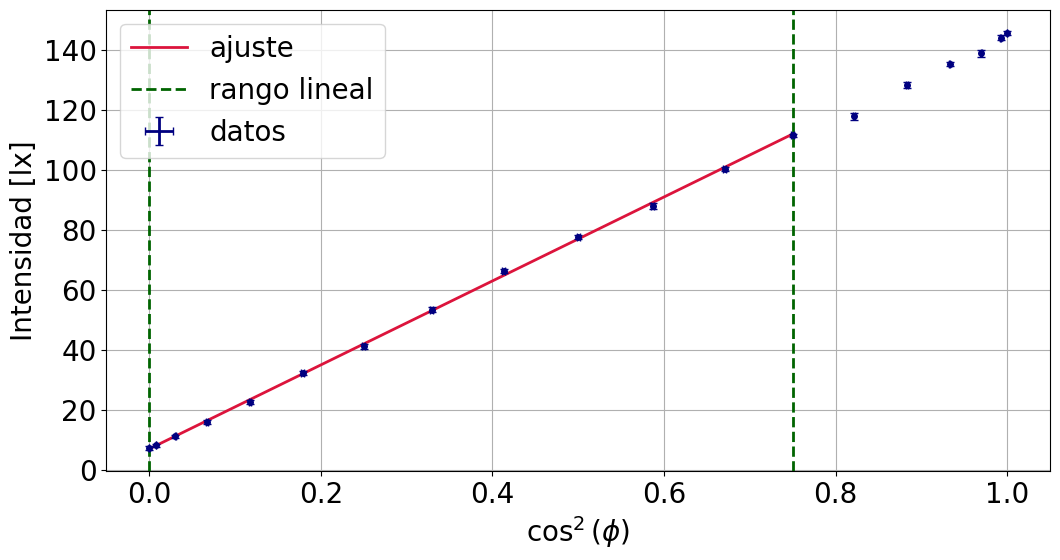

In [48]:
data1 = np.loadtxt('malus600.csv',delimiter=',',unpack=True,skiprows=1)
ruido1,ang1,err_ang1,i1,std1 = data1
err_i1 = np.zeros_like(i1)
for i in range(len(err_i1)):
    err_i1[i] += max(ruido1[i],std1[i])
ang1 += 90
cos1 = np.cos(np.radians(ang1))**2
err_cos1 = abs(2*np.cos(np.radians(ang1))*np.sin(np.radians(ang1))*np.radians(err_ang1))

pars1,cov1 = cf(lineal,cos1[0:-7],i1[0:-7],sigma=err_i1[0:-7],absolute_sigma=True)
a1,b1 = pars1
err_a1 = cov1[0,0]
err_b1 = cov1[1,1]
x_adj1 = np.linspace(cos1[0],cos1[-7],100)
y_adj1 = a1*x_adj1+b1

print(ang1[0],err_ang1[0],ang1[-7],err_ang1[-7],i1[0],err_i1[0],i1[-7],err_i1[-7])
print(chi2_red(i1[0:-7],err_i1[0:-7],cos1[0:-7],lineal,pars1))
print(r2(i1[0:-7],cos1[0:-7],lineal,pars1))

plt.plot(x_adj1,y_adj1,'crimson',label='ajuste',zorder=1)
plt.errorbar(cos1,i1,yerr=err_i1,xerr=err_cos1,fmt='None',ecolor='navy',label='datos',zorder=2)
plt.scatter(cos1,i1,c='navy',zorder=3)
plt.grid()
plt.xlabel(r'$\cos^{2}(\phi)$')
plt.ylabel('Intensidad [lx]')
plt.axvline(x=cos1[0],ls='--',c='darkgreen',label='rango lineal',zorder=1)
plt.axvline(x=cos1[-7],ls='--',c='darkgreen',zorder=1)
plt.legend(loc=2)
plt.savefig('malus_600.png')

110.0 0.1 165.0 0.1 201.7 3.4 1702.6 1.92
17.985285811531625
0.9994363788585944


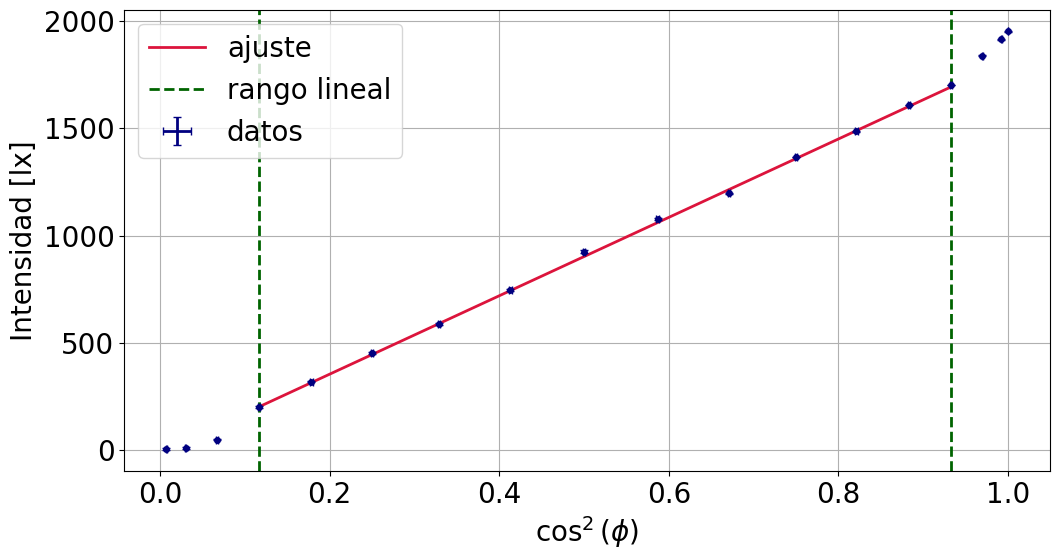

In [49]:
data2 = np.loadtxt('malus 6000.csv',delimiter=',',unpack=True,skiprows=1)
ruido2,ang2,err_ang2,i2,std2 = data2
err_i2 = np.zeros_like(i2)
for i in range(len(err_i2)):
    err_i2[i] += max(ruido2[i],std2[i])
ang2 += 90
cos2 = np.cos(np.radians(ang2))**2
err_cos2 = abs(2*np.cos(np.radians(ang2))*np.sin(np.radians(ang2))*np.radians(err_ang2))

pars2,cov2 = cf(lineal,cos2[3:-4],i2[3:-4],sigma=err_i2[3:-4],absolute_sigma=True)
a2,b2 = pars2
err_a2 = cov2[0,0]
err_b2 = cov2[1,1]
x_adj2 = np.linspace(cos2[3],cos2[-4],100)
y_adj2 = a2*x_adj2+b2

print(ang2[3],err_ang2[3],ang2[-4],err_ang2[-4],i2[3],err_i2[3],i2[-4],err_i2[-4])
print(chi2_red(i2[3:-4],err_i2[3:-4],cos2[3:-4],lineal,pars2))
print(r2(i2[3:-4],cos2[3:-4],lineal,pars2))

plt.plot(x_adj2,y_adj2,'crimson',label='ajuste',zorder=2)
plt.errorbar(cos2,i2,yerr=err_i2,xerr=err_cos2,fmt='None',ecolor='navy',label='datos',zorder=2)
plt.scatter(cos2,i2,c='navy',zorder=3)
plt.grid()
plt.xlabel(r'$\cos^{2}(\phi)$')
plt.ylabel('Intensidad [lx]')
plt.axvline(x=cos2[3],ls='--',c='darkgreen',label='rango lineal',zorder=1)
plt.axvline(x=cos2[-4],ls='--',c='darkgreen',zorder=1)
plt.legend(loc=2)
plt.savefig('malus_6000.png')

90.0 0.1 155.0 0.1 30.8 19.0 11915.0 19.0
5.883431371614893
0.9998792265462977


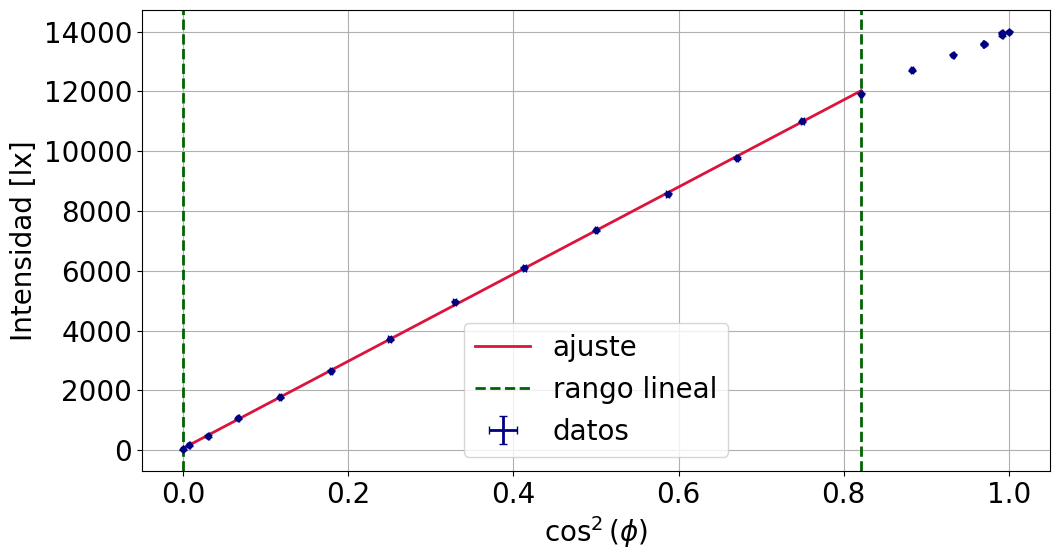

In [61]:
data3 = np.loadtxt('malus150000.csv',delimiter=',',unpack=True,skiprows=1)
ruido3,ang3,err_ang3,i3,std3 = data3
ang3 = 75-ang3
idx_sort3 = np.argsort(ang3)
ang3 = ang3[idx_sort3]
err_ang3 = err_ang3[idx_sort3]
i3 = i3[idx_sort3]
std3 = std3[idx_sort3]
err_i3 = np.zeros_like(i3)
for i in range(len(err_i3)):
    err_i3[i] += max(ruido3[i],std3[i])
ang3 += 90
cos3 = np.cos(np.radians(ang3))**2
err_cos3 = abs(2*np.cos(np.radians(ang3))*np.sin(np.radians(ang3))*np.radians(err_ang3))

pars3,cov3 = cf(lineal,cos3[0:-8],i3[0:-8],sigma=err_i3[0:-8],absolute_sigma=True)
a3,b3 = pars3
err_a3 = cov3[0,0]
err_b3 = cov3[1,1]
x_adj3 = np.linspace(cos3[0],cos3[-8],100)
y_adj3 = a3*x_adj3+b3

print(ang3[0],err_ang3[0],ang3[-8],err_ang3[-8],i3[0],err_i3[0],i3[-8],err_i3[-8])
print(chi2_red(i3[0:-8],err_i3[0:-8],cos3[0:-8],lineal,pars3))
print(r2(i3[0:-8],cos3[0:-8],lineal,pars3))

plt.plot(x_adj3,y_adj3,'crimson',label='ajuste',zorder=2)
plt.errorbar(cos3,i3,yerr=err_i3,xerr=err_cos3,fmt='None',ecolor='navy',label='datos',zorder=2)
plt.scatter(cos3,i3,c='navy',zorder=3)
plt.grid()
plt.xlabel(r'$\cos^{2}(\phi)$')
plt.ylabel('Intensidad [lx]')
plt.axvline(x=cos3[0],ls='--',c='darkgreen',label='rango lineal',zorder=1)
plt.axvline(x=cos3[-8],ls='--',c='darkgreen',zorder=1)
plt.legend()
plt.savefig('malus_150000.png')

In [13]:
I_tot = 47875
I_max = 29502
I_min = 284
err_I_tot = 19
err_I_max = 19
err_I_min = 0.7

V2 = (I_max-I_min)/(I_max+I_min)
err_V2 = np.sqrt(((1/(I_min+I_max)-(I_max-I_min)/(I_max+I_min)**2)*err_I_max)**2+((-1/(I_max+I_min)-(I_max-I_min)/(I_max+I_min)**2)*err_I_min)**2)
print(V2,err_V2)

0.9809306385550258 4.811673152766739e-05
